In [ ]:
# 충청도

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/sns언급량.csv', encoding='utf-8-sig')

print(df.head())  

     년도  월     도  시군구    언급량
0  2024  1  충청남도  공주시  20466
1  2024  2  충청남도  공주시  21763
2  2024  3  충청남도  공주시  23553
3  2024  4  충청남도  공주시  26274
4  2024  5  충청남도  공주시  29286


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      759 non-null    int64 
 1   월       759 non-null    int64 
 2   도       759 non-null    object
 3   시군구     759 non-null    object
 4   언급량     759 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 29.8+ KB
None


In [4]:
# 결측치 확인
df.isnull().sum()

년도     0
월      0
도      0
시군구    0
언급량    0
dtype: int64

In [5]:
df.columns

Index(['년도', '월', '도', '시군구', '언급량'], dtype='object')

In [11]:
# 소수점 둘째 자리까지만 표시
pd.set_option('display.float_format', '{:.2f}'.format)

In [12]:
df.describe()

,년도,월,언급량
count,759.00,759.00,759.00
mean,2021.43,6.35,11007.06
std,1.69,3.40,7058.83
min,2019.00,1.00,2978.00
25%,2020.00,3.00,6226.50
50%,2021.00,6.00,8603.00
75%,2023.00,9.00,13682.50
max,2024.00,12.00,47635.00


In [15]:
# 연도별 시군구별 언급량 합계
yearly_city_data = df.groupby(['년도', '시군구'])['언급량'].sum().reset_index()

yearly_city_data


,년도,시군구,언급량
0,2019,공주시,159122
1,2019,괴산군,74473
2,2019,금산군,49556
3,2019,논산시,86484
4,2019,보령시,114341
...,...,...,...
61,2024,서천군,87712
62,2024,영동군,70478
63,2024,옥천군,77166
64,2024,음성군,95444


In [16]:
# 한글 폰트 설정 

import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 음수값

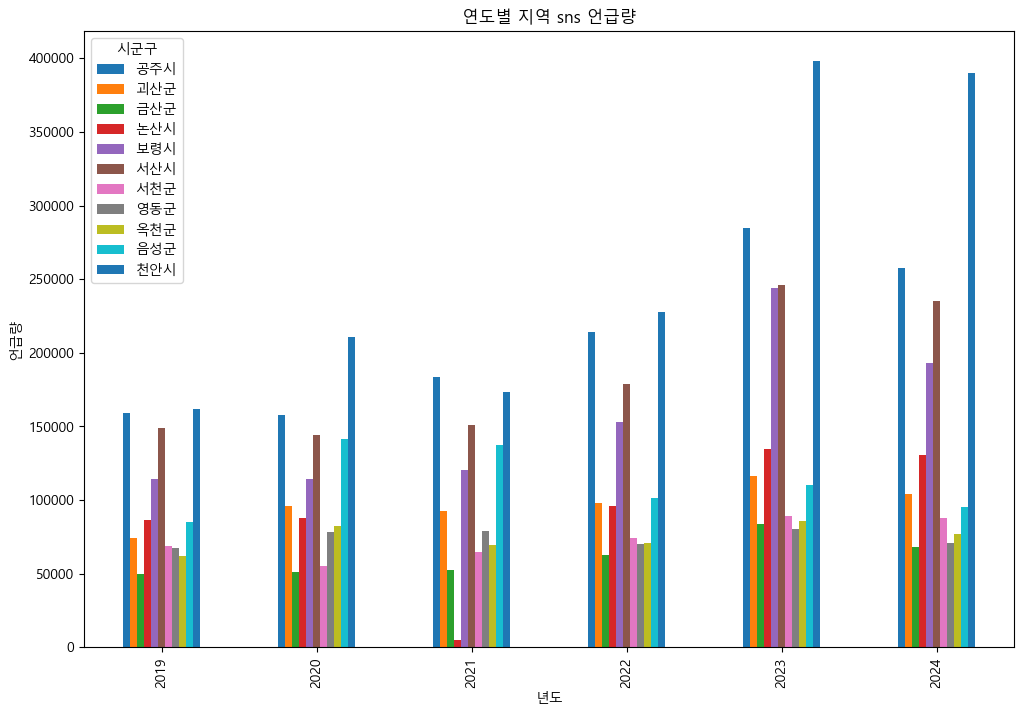

In [18]:
pivot_table = yearly_city_data.pivot(index='년도', columns='시군구', values='언급량')

pivot_table.plot(kind='bar', figsize=(12, 8), title='연도별 지역 sns 언급량')
plt.xlabel('년도')
plt.ylabel('언급량')
plt.legend(title='시군구')
plt.show()

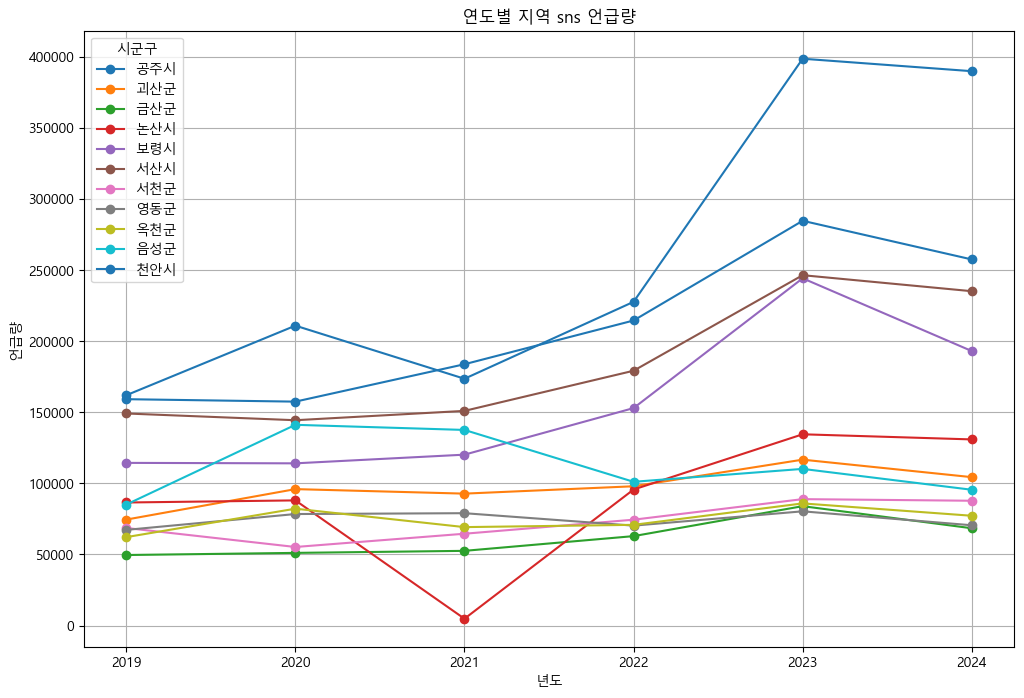

In [19]:
plt.figure(figsize=(12, 8))
for city in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[city], marker='o', label=city)

plt.title('연도별 지역 sns 언급량')
plt.xlabel('년도')
plt.ylabel('언급량')
plt.legend(title='시군구', loc='upper left')
plt.grid(True)
plt.show()


In [20]:
# 특정 지역 필터링
selected_city = '공주시'
city_data = df[df['시군구'] == selected_city]

print(f"{selected_city} 데이터:")
print(city_data.head())


공주시 데이터:
     년도  월     도  시군구    언급량
0  2024  1  충청남도  공주시  20466
1  2024  2  충청남도  공주시  21763
2  2024  3  충청남도  공주시  23553
3  2024  4  충청남도  공주시  26274
4  2024  5  충청남도  공주시  29286


In [23]:
# 연도와 월 결합하여 새로운 컬럼 생성
df['년월'] = df['년도'].astype(str) + '-' + df['월'].astype(str).str.zfill(2)

In [24]:
# 특정 지역 필터링
selected_city = '공주시'
city_data = df[df['시군구'] == selected_city]

print(f"{selected_city} 데이터 (기간별):")
print(city_data[['년월', '언급량']].head())

공주시 데이터 (기간별):
        년월    언급량
0  2024-01  20466
1  2024-02  21763
2  2024-03  23553
3  2024-04  26274
4  2024-05  29286


In [25]:
# 데이터 정렬
city_data = city_data.sort_values(by='년월')

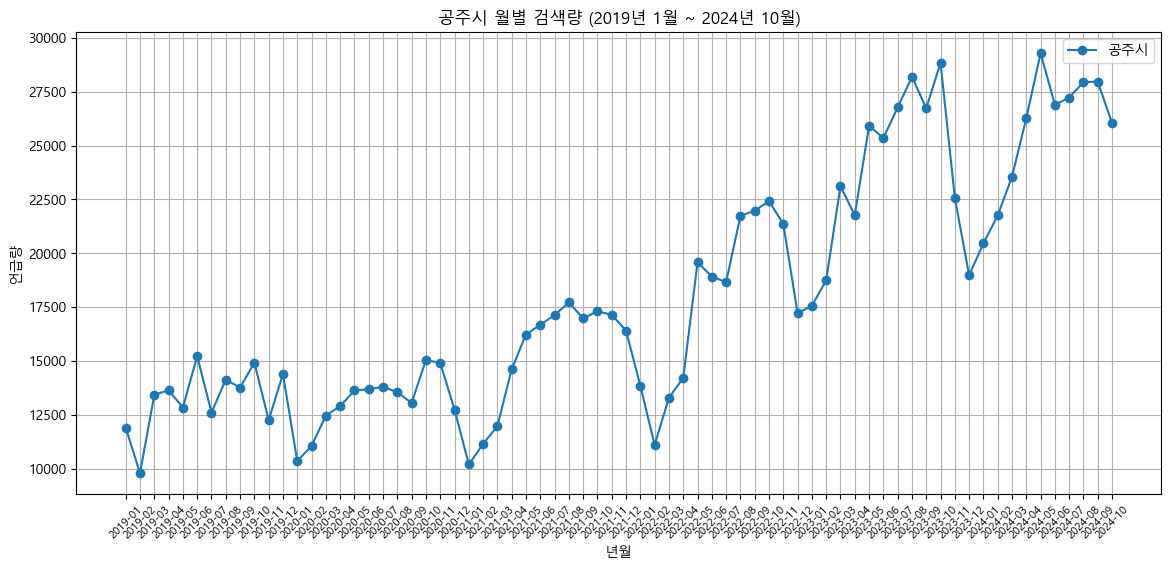

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(city_data['년월'], city_data['언급량'], marker='o', linestyle='-', label=selected_city)
plt.title(f'{selected_city} 월별 검색량 (2019년 1월 ~ 2024년 10월)')
plt.xlabel('년월')
plt.ylabel('언급량')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.legend()
plt.show()

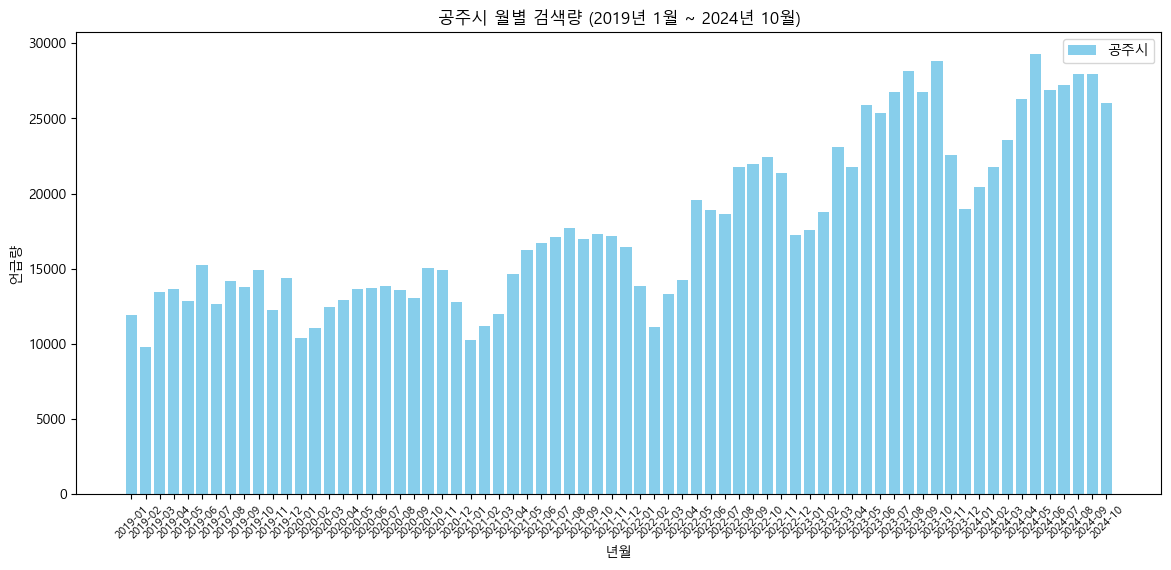

In [27]:
# 막대그래프
plt.figure(figsize=(14, 6))
plt.bar(city_data['년월'], city_data['언급량'], color='skyblue', label=selected_city)
plt.title(f'{selected_city} 월별 검색량 (2019년 1월 ~ 2024년 10월)')
plt.xlabel('년월')
plt.ylabel('언급량')
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.show()
